### Where to Start with Machine Learning and Deep Learning?

This is an honestly difficult question - and you'll see a variety of different approaches. Some start "bottom-up", meaning one tries to learn all of the components of machine learning before actually attempting it. Others start "top-down", meaning one runs machine learning programs or projects before understanding much of how it works, and then tries to understand the components from the most general "down" to the highly specific.

We will tend more towards the top-down approach, but inject focus on specific concepts that are both technical and part of the machine learning terminology. Machine learning involves the fields of applied mathematics, computer science, statistics, information theory, and neuroscience - and that's at a minimum! So, be **patient** with yourself as you take your first steps into this interesting and challenging world. There is a great deal to learn, explore and refine.

Anyways, it would seem a good idea to start with the idea of **learning** before attempting anything further. What is "learning" for a computer (e.g., a machine)?

The basic concept is that *in order to learn there must be:  
* a **target** (like a learning goal or task)
* **training** on target samples
* **testing** performance on new samples 
* a **cost**, also called **loss**, for correction/direction 

Let's say we want a machine learning program that can tell if an image contains a dog or a cat. This is our **target**, and we want to achieve this goal with as high accuracy (little error) as possible. We will **train** our program on sample images of dogs and cats that we have pre-labeled. After training, we will **test** our program (also called a **model**) on new sample images of dogs and cats that we have not yet shown our program. During both the traning and testing processes, we must help our program learn by applying **cost**, or **loss**, when it makes a mistake. Conceptually, this not unlike a classic education model you find at school. 

Let's have a look at how this all works (and doesn't) in a very basic ML program (adapted from: https://github.com/aymericdamien/TensorFlow-Examples ) and then a basic **multi-layer** program (adapted from:https://github.com/pkmital/CADL/blob/master/session-2/lecture-2.ipynb).



In [1]:
import tensorflow as tf
import tensorflow.contrib.layers as tfl
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

/Users/jonathansherman/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/jonathansherman/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Parameters 
learning_rate = 0.05
training_epochs = 1000 #how many cycles of training
display_step = 50

In [3]:
# Training Data 
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# Normalize data by "smushing" to 0.0 - 1.0 "unit" range
train_X = train_X/np.ndarray.max(train_X)
train_Y = train_Y/np.ndarray.max(train_Y)

print(train_X, train_Y)

[0.3058104  0.4077472  0.509684   0.62181448 0.64220183 0.3862478
 0.90621814 0.57288481 0.70336391 0.20081549 0.65258085 1.
 0.49235474 0.74108053 0.52395515 0.85904921 0.28727643] [0.49062049 0.7965368  0.6031746  0.92063492 0.48888889 0.45396825
 0.97142857 0.74920635 0.73015873 0.35238095 0.81587302 1.
 0.47619048 0.83809524 0.6984127  0.84848485 0.37518038]


In [4]:
# tf Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.get_variable("weight", initializer=tf.Variable(np.abs(np.random.randn()), dtype=tf.float32))
b = tf.get_variable("bias", initializer=tf.Variable(np.abs(np.random.randn()), dtype=tf.float32))

In [5]:
# Construct a linear model to predict output of Y given X
Y_pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(Y_pred-Y, 2))/n_samples
# Gradient descent applies our cost/loss function for us
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.016607124 W= 1.0657772 b= 0.060931563
Epoch: 0100 cost= 0.015483667 W= 1.0197772 b= 0.08757741
Epoch: 0150 cost= 0.014691604 W= 0.9815467 b= 0.11052898
Epoch: 0200 cost= 0.014134501 W= 0.9494769 b= 0.1297831
Epoch: 0250 cost= 0.013742703 W= 0.922575 b= 0.14593475
Epoch: 0300 cost= 0.013467183 W= 0.90000707 b= 0.15948384
Epoch: 0350 cost= 0.013273463 W= 0.88107556 b= 0.17085005
Epoch: 0400 cost= 0.013137286 W= 0.8651952 b= 0.18038435
Epoch: 0450 cost= 0.013041565 W= 0.8518728 b= 0.18838274
Epoch: 0500 cost= 0.012974300 W= 0.8406968 b= 0.1950927
Epoch: 0550 cost= 0.012927051 W= 0.83132136 b= 0.20072153
Epoch: 0600 cost= 0.012893872 W= 0.8234576 b= 0.2054428
Epoch: 0650 cost= 0.012870576 W= 0.81686 b= 0.20940392
Epoch: 0700 cost= 0.012854232 W= 0.81132555 b= 0.21272658
Epoch: 0750 cost= 0.012842772 W= 0.8066832 b= 0.21551381
Epoch: 0800 cost= 0.012834740 W= 0.80278903 b= 0.21785197
Epoch: 0850 cost= 0.012829120 W= 0.79952204 b= 0.21981324
Epoch: 0900 cost= 0.012825185 

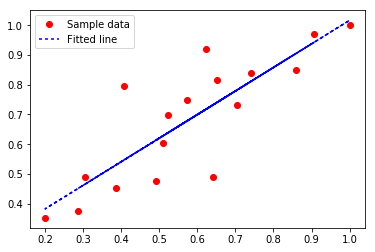

In [8]:

# Start training# Start 
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Plot sample data
    plt.plot(train_X, train_Y, 'ro', label='Sample data')
    
    #Plot linear prediction
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), dashes=[2, 2], color='blue', label='Fitted line')
    plt.legend()
    plt.show()

You can compare this 'toy' model with Google's widget here: https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise

What is essential to notice is how the cost updates the **weight** and **bias** of our predicted output for Y. This allows our program to "fit" the data by charting a line through the central relationship between X and Y samples.

While our model is able to fit a straight line through linear data, it is quite limited. A straight line can only separate very linear data. What if our data is non-linear (e.g. curved) or if has significant outliers (extreme values)? A linear cost function won't work - Let's see if we can fit a quadratic cost function to such a data collection. 

In [9]:
#reset our graph values
tf.reset_default_graph()

In [10]:
train_X = np.linspace(0, 1, 100)

train_Y = []
for _ in range(len(train_X)):
    train_Y = np.sin(train_X*np.pi*2) + np.random.uniform(0., 1., len(train_X)) + 1

train_Y = train_Y/np.ndarray.max(train_Y)
    
n_samples = train_X.shape[0]

In [11]:
# tf Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.get_variable("weight", initializer=tf.Variable(np.random.randn()), dtype=tf.float32)
b = tf.get_variable("bias", initializer=tf.constant(0, dtype=tf.float32))

In [12]:
# Construct a polynomial model to predict output of Y given X
#Y_pred = X**2 + X*W + b
#Y_pred = tf.add(tf.add(tf.multiply(X, X), tf.multiply(X, W)), b)
Y_pred = tf.Variable(tf.random_normal([1]), name='prediction')
for pow_i in range(1, 4):
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), tf.add(Y_pred, b))
    

In [13]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(Y_pred-Y, 2))/n_samples
# Gradient descent applies our cost/loss function for us
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.036348600 W= -0.18698278 b= 0.46893328
Epoch: 0100 cost= 0.036515359 W= -0.17771105 b= 0.46485823
Epoch: 0150 cost= 0.036524478 W= -0.1773681 b= 0.4647088
Epoch: 0200 cost= 0.036524829 W= -0.17735514 b= 0.46470755
Epoch: 0250 cost= 0.036524836 W= -0.17735477 b= 0.46471062
Epoch: 0300 cost= 0.036524836 W= -0.17735477 b= 0.4647136
Epoch: 0350 cost= 0.036524836 W= -0.17735477 b= 0.46471658
Epoch: 0400 cost= 0.036524836 W= -0.17735477 b= 0.46471956
Epoch: 0450 cost= 0.036524836 W= -0.17735477 b= 0.46472254
Epoch: 0500 cost= 0.036524836 W= -0.17735477 b= 0.46472552
Epoch: 0550 cost= 0.036524836 W= -0.17735477 b= 0.4647285
Epoch: 0600 cost= 0.036524836 W= -0.17735477 b= 0.46473148
Epoch: 0650 cost= 0.036524836 W= -0.17735477 b= 0.46473446
Epoch: 0700 cost= 0.036524836 W= -0.17735477 b= 0.46473745
Epoch: 0750 cost= 0.036524836 W= -0.17735477 b= 0.46474043
Epoch: 0800 cost= 0.036524836 W= -0.17735477 b= 0.4647434
Epoch: 0850 cost= 0.036524836 W= -0.17735477 b= 0.4647464
Epo

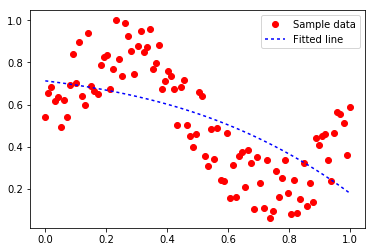

In [15]:

# Start training# Start 
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Plot sample data
    plt.plot(train_X, train_Y, 'ro', label='Sample data')
    #Plot linear prediction
    #plt.plot(train_X, train_X * train_X + sess.run(W) * train_X + sess.run(b), dashes=[2, 2], color='blue', label='Fitted line')
    plt.plot(train_X, sess.run(Y_pred, feed_dict={X: train_X}), dashes=[2, 2], color='blue', label='Fitted line')
    
    # all this just to avoid duplicating legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.show()

In [16]:
tf.reset_default_graph()
sess.close()

This does a bad job of fitting. Visually, we can see it curve, but it has no ability to fit the data, which is has sine wave motion. Our function is **underfitting**. **Overfitting**, on the other hand, is when our cost function is *too* complex for our data. This can often be shown as curving too much or in the wrong directions.

### Network Layers and Nonlinear Activation Functions

Our model above has a major problem: the polynomial function we used for **regression** (our Y_pred prediction of the true Y given X) is not able to **generalize** well (meaning it cannot fit a wide variety of data ranges and features). While we could certainly find better machine learning algorithms than this poor polynomial regression or condition the data so it can fit, let's jump on the deep learning bandwagon and see how it can approach this problem. 

Deep learning has found that adding "layers" and **"activation"** functions can help models better fit more generalized data. You can think of layers as multiple levels of a process - for example instead of one instance of Y_pred = WX + b, we could do it several times in a chain, like: ```L1 = WX + b, and L2 = W*L1 + b and Y_pred = W*L2 + b```. So we pass the result of each layer to the next layer. And we can transform dimensions during this process too. It can get very technical, so we'll just focus on coding it and seeing it in action.

And for the so-called activation functions, you can think of these as functions that give a certain shape to a range of numbers. These activation functions are generally **nonlinear**, and common examples are tanh, sigmoid and relu. See below

/Users/jonathansherman/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


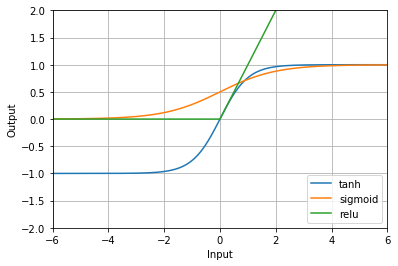

In [17]:
# These activations each give a particular output range for the input range 

x_ = np.linspace(-6,6,1000)
with tf.Session() as sess:
    plt.plot(x_, tf.nn.tanh(x_).eval(), label='tanh')
    plt.plot(x_, tf.nn.sigmoid(x_).eval(), label='sigmoid')
    plt.plot(x_, tf.nn.relu(x_).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')
plt.show()



Here instead of feeding our training examples 1 by 1, we are going to feed them by **batches**. Batches are groups of samples, and this has some benefits. First, they can be more computationally efficient (on GPUs) by grouping array operations. Second, if we randomize the examples in the batches, we can help ensure that our model is not learning *based on the repeating order of training examples*, as this could greatly distort the performance capabilities of the model in a real setting.

In [18]:
sess = tf.Session()
#g = tf.Graph()

train_X = np.linspace(0, 1, 1000)

train_Y = []
for _ in range(len(train_X)):
    train_Y = np.sin(train_X*np.pi*2) + np.random.uniform(0., 1., len(train_X)) + 1

train_Y = train_Y/np.ndarray.max(train_Y)
    
n_samples = train_X.shape[0]

idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [19]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    fig, ax = plt.subplots(1, 1)
    ax.scatter(train_X, train_Y, alpha=0.99, c='r')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        cost = tf.reduce_mean(tf.abs(Y_pred - Y))
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

        # We now run a loop over epochs
        for it_i in range(n_iterations):
            # scrambles the order of data so the model can't learn what comes next
            idxs = np.random.permutation(range(len(train_X)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: train_X[idxs_i], Y: train_Y[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: train_X}, session=sess)
                ax.plot(train_X, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    fig.show()
    plt.draw()
    plt.show()


In [20]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        if activation is None:
            h = tf.matmul(X, W) + b
        if activation is "tanh":
            h = tf.nn.tanh(tf.matmul(X, W) + b, name='tanh')
        if activation is "sigmoid":
            h = tf.nn.sigmoid(tf.matmul(X, W) + b, name='sigmoid')
        if activation is "relu":
            h = tf.nn.relu(tf.matmul(X, W) + b, name='relu')
        print(tf.shape(h))
        return h

Let's see a single layer with the relu activation function, in which we input 1-node and output 10.

Tensor("layer_1/Shape:0", shape=(2,), dtype=int32)
0.32034263
0.1680387
0.1448968
0.14214933
0.14166266
0.14151877
0.1412973
0.14117764
0.14109814
0.14118288
0.14071396
0.14067598
0.14064747
0.14031436
0.14043264
0.14011334
0.1400343
0.13999979
0.13970861
0.13958605
0.13963565
0.13942166
0.13925083
0.13911967
0.13911703
0.13883002
0.13870794
0.1385918
0.13849124
0.13837303
0.13825797
0.1381326
0.13802966
0.1380625
0.1377979
0.13785022
0.1376043
0.13762769
0.1373757
0.13726398
0.13715091
0.137043
0.13709702
0.13686544
0.13679904
0.13669291
0.13661392
0.1364787
0.13647495
0.13631314
0.13620435
0.13606393
0.1359742
0.13584732
0.13579921
0.13576962
0.13555737
0.13558604
0.13538449
0.1352779
0.13519232
0.13510403
0.13501745
0.135168
0.13487788
0.13482238
0.13478641
0.13458972
0.13455448
0.13443929
0.13436306
0.1342631
0.13420036
0.13412915
0.13425043
0.1339368
0.13391162
0.13386533
0.13374232
0.1336383
0.13359092
0.13354038
0.13360783
0.13341561
0.13325903
0.13322543
0.13313647
0.13313699
0

/Users/jonathansherman/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


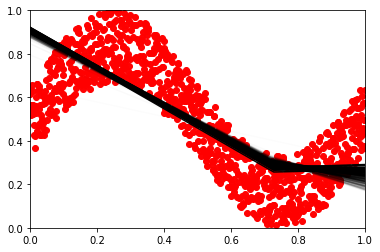

In [21]:

# tf Graph Input
X = tf.placeholder(tf.float32, name="x")
Y = tf.placeholder(tf.float32, name="y")
X_1 = tf.expand_dims(X,1)
h = linear(X_1, 1, 10, activation='relu', scope='layer_1')
Y_pred = tf.reduce_sum(h, 1) 

# And retrain w/ our new Y_pred
train(X, Y, Y_pred, n_iterations=1000)

Now for 3 interconnected layers of that is wide and then slimmer with input and output nodes.

Tensor("layer_1/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_2/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_3/Shape:0", shape=(2,), dtype=int32)
0.37174574
0.22432752
0.20452389
0.18712945
0.17082343
0.15577383
0.14329863
0.13398175
0.12759773
0.12380249
0.121618815
0.12022864
0.119311735
0.11860294
0.118003555
0.11746798
0.117002435
0.11655475
0.11617215
0.11578299
0.115405105
0.11503745
0.114652865
0.11429504
0.11391533
0.11355583
0.1132038
0.11286424
0.112471245
0.11212703
0.11176622
0.11141736
0.11106749
0.110732496
0.11037685
0.110044494
0.10971004
0.10939653
0.10908437
0.1087293
0.10839998
0.10806463
0.10780153
0.10741636
0.107084356
0.10673358
0.10640559
0.1060547
0.105728865
0.10540841
0.10507675
0.10475413
0.10441699
0.10411601
0.10375479
0.10343458
0.103092395
0.102759376
0.10245154
0.10209824
0.10174843
0.101387896
0.101059236
0.10073432
0.10033791
0.09999646
0.09964503
0.09932623
0.098976836
0.098645255
0.098258376
0.09791273
0.09761311
0.09724918
0.09690565
0.09661

/Users/jonathansherman/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


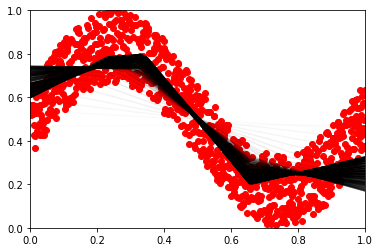

In [22]:
tf.reset_default_graph()
# tf Graph Input
X = tf.placeholder(tf.float32, name="x")
Y = tf.placeholder(tf.float32, name="y")
# to avoid TF complaining about non-matrix mult.
X_1 = tf.expand_dims(X,1)
h = linear(X_1, 1, 100, activation='relu', scope='layer_1')
h2 = linear(h, 100, 50, activation='relu', scope='layer_2')
h3 = linear(h2, 50, 1, activation='relu', scope='layer_3')
Y_pred = tf.reduce_sum(h3, 1) 

# And retrain w/ our new Y_pred
train(X, Y, Y_pred, n_iterations=1000)

Which combinations of activation functions and layers and nodes work best for you, and why? What if we had different training data ranges?

In [23]:
for op in tf.get_default_graph().get_operations(): 
    print(op.name)

x
y
ExpandDims/dim
ExpandDims
layer_1/W/Initializer/random_normal/shape
layer_1/W/Initializer/random_normal/mean
layer_1/W/Initializer/random_normal/stddev
layer_1/W/Initializer/random_normal/RandomStandardNormal
layer_1/W/Initializer/random_normal/mul
layer_1/W/Initializer/random_normal
layer_1/W
layer_1/W/Assign
layer_1/W/read
layer_1/b/Initializer/Const
layer_1/b
layer_1/b/Assign
layer_1/b/read
layer_1/MatMul
layer_1/add
layer_1/tanh
layer_1/Shape
layer_2/W/Initializer/random_normal/shape
layer_2/W/Initializer/random_normal/mean
layer_2/W/Initializer/random_normal/stddev
layer_2/W/Initializer/random_normal/RandomStandardNormal
layer_2/W/Initializer/random_normal/mul
layer_2/W/Initializer/random_normal
layer_2/W
layer_2/W/Assign
layer_2/W/read
layer_2/b/Initializer/Const
layer_2/b
layer_2/b/Assign
layer_2/b/read
layer_2/MatMul
layer_2/add
layer_2/tanh
layer_2/Shape
layer_3/W/Initializer/random_normal/shape
layer_3/W/Initializer/random_normal/mean
layer_3/W/Initializer/random_normal/s

In [24]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [25]:
show_graph(tf.get_default_graph())

/Users/jonathansherman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()


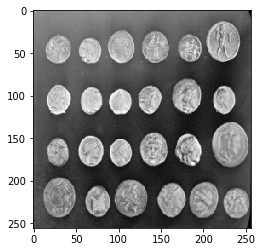

In [111]:
from skimage.data import coins
from scipy.misc import imresize
img = imresize(coins(), (256, 256))
plt.imshow(img, cmap='gray')
plt.show()

In [112]:

# We'll first collect all the positions in the image in our list, xs# We'll  
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# add dim for ys (so tf treats it as matrix)

ys = np.expand_dims(ys, axis=1)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape

((65536, 2), (65536, 1))

In [113]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='Y')


n_neurons  = [2, 256, 128, 64, 32, 64, 128, 256, 1]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation="relu" if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

Tensor("layer_1/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_2/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_3/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_4/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_5/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_6/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_7/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_8/Shape:0", shape=(2,), dtype=int32)


0 36.523308
1 35.26539
2 32.333805
3 27.191738
4 25.829021
5 25.019724
6 23.982887
7 22.195276
8 20.265215
9 19.41584
10 18.41771
11 17.967064
12 17.791927
13 16.333282
14 17.744555
15 15.49715
16 18.792652
17 15.558456
18 15.881401
19 16.140886


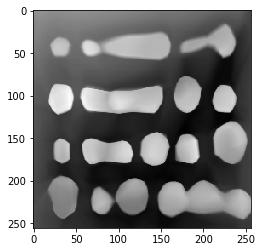

20 15.362839
21 15.311407
22 15.344559
23 13.053139
24 14.564014
25 14.263998
26 13.081589
27 12.923237
28 12.400931
29 12.019697
30 11.765991
31 12.665373
32 12.903653
33 11.346622
34 11.239098
35 12.011708
36 12.079126
37 11.797453
38 11.33567
39 10.368823


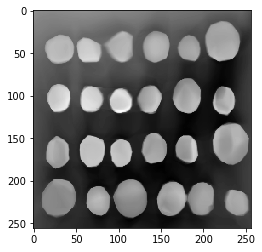

40 11.485781
41 12.297686
42 11.295892
43 11.645327
44 10.562279
45 11.1034565
46 11.067783
47 11.0264225
48 10.944082
49 11.405529
50 11.303804
51 10.511036
52 9.932566
53 10.40831
54 10.785894
55 11.518261
56 10.357758
57 10.93852
58 10.65502
59 9.802686


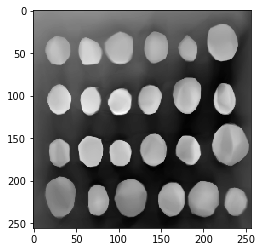

60 10.626568
61 10.815012
62 10.9104595
63 9.862385
64 9.869511
65 9.423758
66 10.532825
67 10.459223
68 9.79457
69 10.866904
70 9.429998
71 10.934999
72 9.987117
73 10.783197
74 9.414192
75 9.944922
76 10.467518
77 9.304351
78 10.672087
79 9.485544


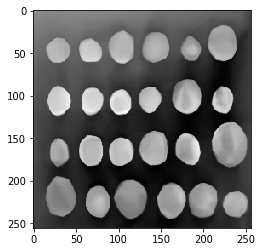

80 10.100023
81 11.7292
82 9.374462
83 9.472441
84 9.308235
85 9.052109
86 8.615533
87 9.460857
88 9.0507345
89 9.757612
90 9.67355
91 10.310195
92 9.551941
93 9.925756
94 8.932999
95 10.642415
96 9.12116
97 9.256109
98 9.553117
99 10.223524


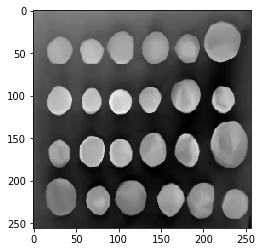

100 9.446802
101 9.250325
102 9.408761
103 8.857954
104 9.335027
105 9.901513
106 8.392831
107 9.000137
108 9.053652
109 9.261869
110 8.573284
111 9.441962
112 8.903452
113 8.981653
114 8.51557
115 7.846236
116 9.282711
117 8.900177
118 8.91551
119 8.976626


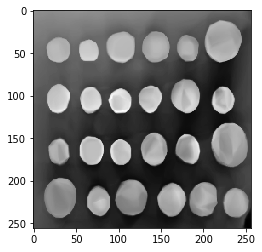

120 8.313803
121 8.806925
122 7.991993
123 8.67348
124 8.091427
125 8.620636
126 8.485624
127 9.079237
128 8.189934
129 8.06372
130 8.720146
131 7.7768116
132 9.703791
133 8.483535
134 8.762608
135 8.32696
136 8.329704
137 8.17448
138 8.604682
139 8.106827


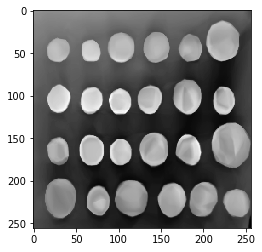

140 8.840858
141 8.503004
142 9.067575
143 8.601374
144 8.238104
145 8.496868
146 7.6074295
147 7.8349214
148 8.764889
149 8.622407
150 8.062513
151 8.223839
152 8.2883625
153 8.540022
154 7.52153
155 8.504715
156 7.826849
157 7.9380713
158 8.26831
159 7.421534


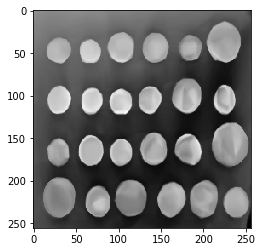

160 7.9906797
161 8.107815
162 8.980165
163 8.250441
164 8.179661
165 7.969656
166 8.298348
167 7.7807813
168 8.206144
169 7.9548206
170 8.517118
171 7.5647755
172 8.273113
173 8.300373
174 8.048063
175 8.065257
176 8.221399
177 7.4889264
178 7.623086
179 8.520557


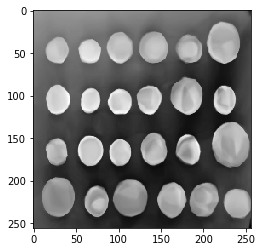

180 8.088629
181 8.109515
182 9.299974
183 8.170494
184 8.233571
185 7.7009115
186 8.213859
187 7.638114
188 8.337643
189 7.923627
190 8.014051
191 8.01866
192 7.5766516
193 7.80064
194 7.58428
195 8.434536
196 8.008244
197 7.5264273
198 7.6530824
199 8.04607


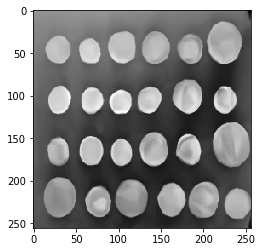

200 7.6639543
201 8.706165
202 8.139634
203 8.886216
204 8.207314
205 7.681778
206 7.0749598
207 8.359317
208 7.948267
209 7.5771084
210 8.015204
211 7.5614877
212 8.011316
213 7.495656
214 7.237632
215 7.68362
216 7.793538
217 8.159579
218 7.4262323
219 7.4381757


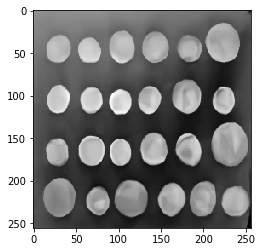

220 7.583865
221 7.3926945
222 7.0016603
223 7.9322076
224 8.8604145
225 7.072991
226 7.508213
227 8.142286
228 7.4328823
229 7.673195
230 7.309531
231 7.5658035
232 7.389636
233 7.1904674
234 8.212103
235 7.5225315
236 7.530992
237 7.3667393
238 7.797456
239 7.144696


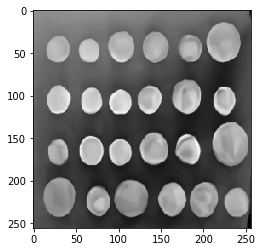

240 7.114149
241 7.0617046
242 7.2989936
243 7.430464
244 7.7153363
245 8.09952
246 7.3436136
247 7.188135
248 7.0960517
249 7.239567
250 7.407153
251 7.6652575
252 6.985491
253 7.441676
254 7.472988
255 7.3444605
256 7.278395
257 7.3184643
258 7.607551
259 7.123229


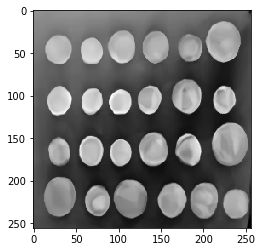

260 7.2411604
261 6.7355757
262 7.648284
263 7.30614
264 8.073509
265 7.2304897
266 6.979162
267 7.438322
268 7.9783697
269 7.648884
270 7.1280146
271 7.917206
272 8.174307
273 7.6686974
274 6.872222
275 7.506475
276 7.076728
277 7.209218
278 6.8430195
279 7.501356


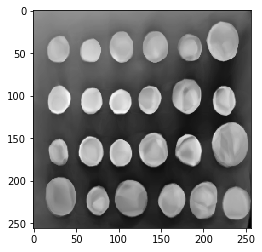

280 7.038375
281 7.498284
282 7.0329742
283 7.7606945
284 6.728625
285 7.3637123
286 7.082285
287 6.963482
288 7.2715564
289 6.94026
290 7.0292206
291 7.447631
292 7.0375175
293 7.2689757
294 6.8185296
295 7.124883
296 6.7230844
297 6.6700478
298 7.2698684
299 7.6405306


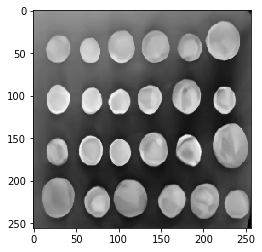

300 6.8626485
301 7.145703
302 6.984486
303 7.0242186
304 7.3221455
305 7.272295
306 7.1084094
307 7.6061325
308 6.880295
309 7.1102304
310 7.298318
311 7.112508
312 7.1078486
313 6.6785393
314 7.5449104
315 8.217279
316 7.1817875
317 6.516183
318 6.8284683
319 6.649088


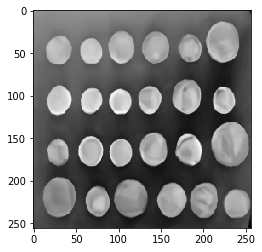

320 6.8352723
321 6.8905706
322 7.2071075
323 6.8473325
324 7.048829
325 6.8270416
326 6.6251535
327 6.993305
328 6.864545
329 6.9198804
330 6.727949
331 6.842907
332 6.965731
333 7.153282
334 6.7976227
335 6.8298397
336 6.998889
337 7.0262403
338 7.0120573
339 7.1594877


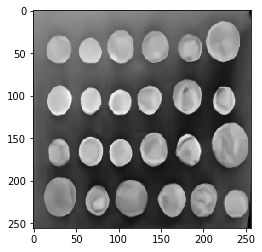

340 6.8052573
341 7.216938
342 6.887009
343 6.472888
344 6.623444
345 6.82067
346 7.5233965
347 6.839267
348 7.064539
349 7.185512
350 6.572173
351 7.1194158
352 6.371476
353 7.020558
354 6.8466187
355 6.80555
356 7.09416
357 6.4234753
358 6.550333
359 6.4281673


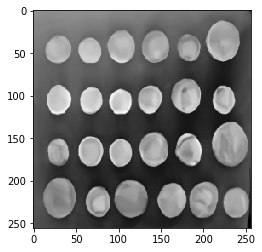

360 7.0610995
361 7.069832
362 6.502805
363 6.810592
364 7.288962
365 6.545368
366 6.8154902
367 6.478202
368 6.980379
369 6.5279436
370 7.0413237
371 6.549077
372 6.83004
373 6.5003195
374 6.577774
375 7.511071
376 6.6993113
377 7.5571218
378 6.518471
379 6.8146887


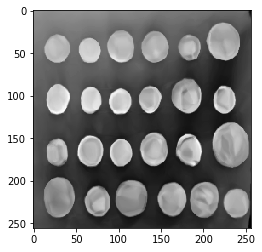

380 7.1527715
381 7.2134256
382 6.3376217
383 6.3613605
384 7.339669
385 7.1112027
386 7.041972
387 7.541316
388 7.0187936
389 6.4417424
390 6.8284574
391 6.5222387
392 7.071591
393 6.902424
394 6.7727985
395 6.158846
396 6.122244
397 6.8950853
398 6.87169
399 6.57053


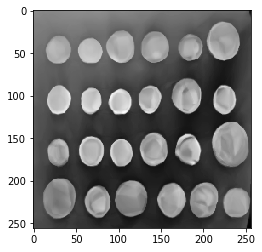

400 6.833724
401 6.7154365
402 6.581778
403 6.3520417
404 6.9684863
405 6.638686
406 6.7243237
407 6.567736
408 7.0383096
409 6.24407
410 6.5382442
411 6.8293834
412 6.8110576
413 6.3949256
414 6.9112315
415 6.605401
416 6.6551447
417 6.501538
418 6.382016
419 7.088361


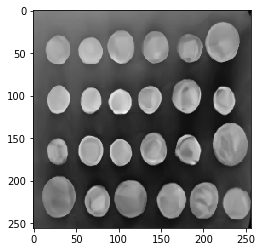

420 6.9142747
421 6.5118084
422 6.593709
423 6.3372507
424 6.3110676
425 7.7526712
426 6.5911484
427 7.162324
428 6.7272344
429 6.36474
430 6.4584885
431 6.493085
432 6.785869
433 6.6504292
434 6.560089
435 6.377067
436 6.479416
437 6.8522596
438 6.566016
439 6.876625


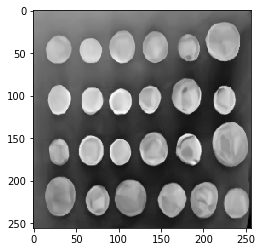

440 7.1696978
441 6.3172884
442 6.43663
443 6.4379964
444 6.6128297
445 6.713255
446 6.5040054
447 5.9790916
448 6.1029553
449 6.419464
450 6.2525854
451 6.5799727
452 6.327374
453 6.6086674
454 6.797873
455 6.282618
456 6.1054244
457 6.6725254
458 6.3671284
459 6.1505156


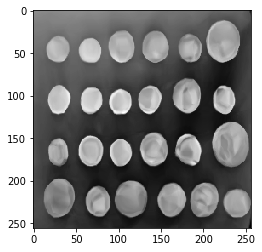

460 6.937892
461 6.6569767
462 6.548117
463 6.5015917
464 6.992709
465 6.2381225
466 6.2237797
467 6.179372
468 6.7503834
469 6.865277
470 6.534954
471 6.5136075
472 6.4550943
473 6.4442987
474 6.3676586
475 6.2171755
476 6.4533195
477 6.522588
478 6.409245
479 6.120507


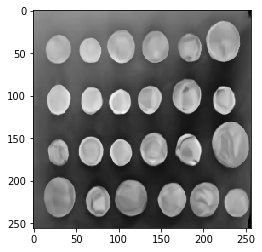

480 6.140014
481 6.1432137
482 6.2041306
483 6.1737137
484 6.316518
485 6.6533246
486 6.219288
487 6.5557814
488 5.8156743
489 6.5983443
490 6.2402797
491 6.1031265
492 6.1515894
493 6.675769
494 6.381483
495 6.2788916
496 6.2777767
497 5.9423685
498 6.368233
499 6.4009776


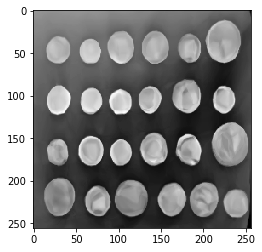

In [114]:
cost = tf.reduce_mean(
    tf.reduce_sum(tf.abs(Y_pred - Y), 1))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img, cmap='gray')
            plt.show()

We can also try to predict the normal (aka Gaussian) distribution instead of grayscale/rgb values. To do so we'll need to compute the means and standard deviation of our linear regression. This is called a **mixture density model**, or MDN. It's a bit ahead of where we need to be at this moment learning-wise, but perhaps the performance comparison is interesting. Note what we are doing is computing the density of Y given X (out of a possible total of 1. if all Y occured at a given X) and using this as our **cost function** instead of taking the mean of the absolute difference

In [134]:
tf.reset_default_graph()

xs = []
ys = []
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        xs.append([row_i, col_i])
        ys.append(img[row_i, col_i])

xs = np.array(xs)
ys = np.array(ys)

xs = (xs - np.mean(xs)) / np.std(xs)
ys = (ys / 255.0)

# add dim for ys (so tf treats it as matrix)
ys = np.expand_dims(ys, axis=1)

In [135]:
# probability density function
# Note: not sure if below or sigma out of sqrt is right
def gausspdf(x, mean, sigma):
    return tf.exp(-(x - mean)**2 /
                  (2 * sigma**2)) / (tf.sqrt(2.0 * np.pi * sigma))

#def gausspdf(x, mean, sigma):
#    dist = tf.contrib.distributions.Normal(mean, sigma) 
#    return dist.prob(x)

def build_single_gaussian_model(n_input_features=2,
                                n_output_features=1,
                                n_neurons =[64, 28, 28, 14, 18, 54]):

    
    X = tf.placeholder(tf.float32, shape=[None, n_input_features], name='X')
    Y = tf.placeholder(tf.float32, shape=[None, n_output_features], name='Y')
    
    current_input = X
    for layer_i in range(1, len(n_neurons)):
        current_input = tfl.linear(
            inputs=current_input,
            num_outputs=n_neurons[layer_i],
            activation_fn=tf.nn.sigmoid,
            scope='layer/' + str(layer_i))
    means = tfl.linear(
        inputs=current_input,
        num_outputs=n_output_features,
        activation_fn=None,
        scope='means')
    sigmas = tf.maximum(
        tfl.linear(
            inputs=current_input,
            num_outputs=n_output_features,
            activation_fn=tf.nn.sigmoid,
            scope='sigmas'), 1e-8)

    p = gausspdf(Y, means, sigmas)
    negloglike = -tf.log(tf.maximum(p, 1e-8))
    cost = tf.reduce_mean(tf.reduce_sum(negloglike, 1))
    #cost = tf.reduce_mean(tf.reduce_mean(negloglike, 1))
    return X, Y, cost, means

cost: [0.43974274]
cost: [0.47250092]
cost: [0.42200145]
cost: [0.46008188]
cost: [0.41997075]
cost: [0.4572236]
cost: [0.38412964]
cost: [0.37788528]
cost: [0.39451888]
cost: [0.38402373]
cost: [0.34910983]
cost: [0.33290285]
cost: [0.31898326]
cost: [0.29493442]
cost: [0.32497925]
cost: [0.3130185]
cost: [0.30060816]
cost: [0.2876197]
cost: [0.30074924]
cost: [0.30877227]


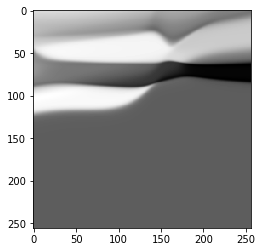

cost: [0.2926311]
cost: [0.2803246]
cost: [0.29155532]
cost: [0.28477043]
cost: [0.27924407]
cost: [0.2711628]
cost: [0.26283976]
cost: [0.26815617]
cost: [0.28716797]
cost: [0.2660337]
cost: [0.26395065]
cost: [0.26758552]
cost: [0.29732198]
cost: [0.2706843]
cost: [0.30645365]
cost: [0.27090448]
cost: [0.3126737]
cost: [0.2745288]
cost: [0.26054615]
cost: [0.27117804]


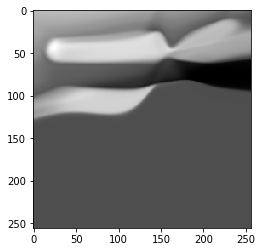

cost: [0.23677208]
cost: [0.24503104]
cost: [0.26665252]
cost: [0.30111873]
cost: [0.28824538]
cost: [0.25770712]
cost: [0.23971185]
cost: [0.23735617]
cost: [0.20676547]
cost: [0.24438661]
cost: [0.22250019]
cost: [0.19475242]
cost: [0.18255118]
cost: [0.19914186]
cost: [0.22350016]
cost: [0.20961097]
cost: [0.20443602]
cost: [0.18542412]
cost: [0.1862053]
cost: [0.1647927]


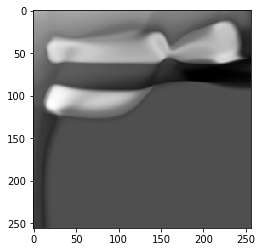

cost: [0.17759088]
cost: [0.30687666]
cost: [0.2339844]
cost: [0.20844668]
cost: [0.20758164]
cost: [0.20591775]
cost: [0.14047746]
cost: [0.20263007]
cost: [0.19672146]
cost: [0.18763599]
cost: [0.17362149]
cost: [0.17204684]
cost: [0.15624118]
cost: [0.1756058]
cost: [0.16220997]
cost: [0.13080901]
cost: [0.14047357]
cost: [0.16623026]
cost: [0.16554701]
cost: [0.16439041]


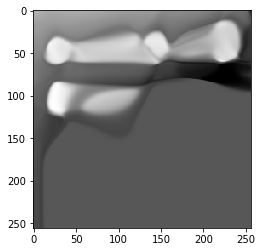

cost: [0.18346101]
cost: [0.12358248]
cost: [0.27756408]
cost: [0.110314]
cost: [0.15002584]
cost: [0.19408679]
cost: [0.13729106]
cost: [0.19920209]
cost: [0.11860269]
cost: [0.09878585]
cost: [0.102238536]
cost: [0.08699609]
cost: [0.23248373]
cost: [0.08957641]
cost: [0.07081068]
cost: [0.10025568]
cost: [0.13740212]
cost: [0.117338166]
cost: [0.12578535]
cost: [0.10183045]


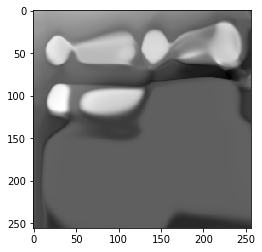

cost: [0.16644105]
cost: [0.08140302]
cost: [0.12742752]
cost: [0.037437]
cost: [0.043195702]
cost: [0.08212452]
cost: [0.07022798]
cost: [0.062132314]
cost: [0.11207851]
cost: [0.11847021]
cost: [0.017870482]
cost: [0.037911154]
cost: [0.028316233]
cost: [0.020782009]
cost: [0.008552186]
cost: [0.016136732]
cost: [-0.003706295]
cost: [0.21144758]
cost: [0.029279955]
cost: [0.08014481]


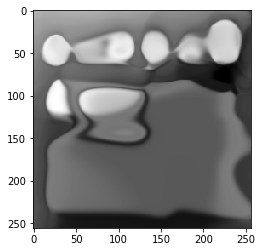

cost: [0.016585823]
cost: [0.037590638]
cost: [0.03302245]
cost: [0.08551377]
cost: [0.0132739525]
cost: [0.013017967]
cost: [-0.029004738]
cost: [-0.00047195953]
cost: [0.082697585]
cost: [0.12015487]
cost: [0.047763944]
cost: [0.018883709]
cost: [-0.022692047]
cost: [0.008446689]
cost: [0.018975515]
cost: [-0.018228112]
cost: [-0.017563874]
cost: [0.100097]
cost: [-0.012913823]
cost: [-0.044680264]


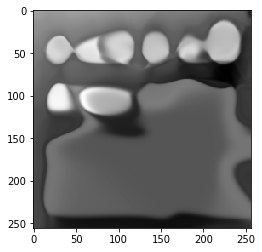

cost: [-0.050309315]
cost: [0.0064755846]
cost: [0.018914333]
cost: [-0.03674421]
cost: [-0.041894794]
cost: [0.10104455]
cost: [-0.004435356]
cost: [-0.046588413]
cost: [0.012946209]
cost: [-0.049436677]
cost: [-0.005872771]
cost: [0.010185191]
cost: [-0.022181738]
cost: [-0.015215544]
cost: [0.018484471]
cost: [-0.0021021338]
cost: [-0.0147798015]
cost: [0.068712756]
cost: [0.04255464]
cost: [0.022132007]


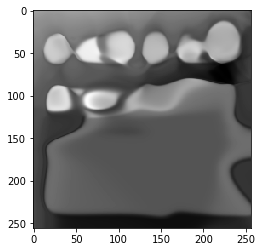

cost: [-0.059798446]
cost: [0.021029407]
cost: [-0.04069388]
cost: [0.09009308]
cost: [-0.061154168]
cost: [-0.068105064]
cost: [0.0021495968]
cost: [-0.013460748]
cost: [-0.09322265]
cost: [0.023354756]
cost: [0.07963562]
cost: [-0.062422365]
cost: [-0.073852055]
cost: [0.00873735]
cost: [-0.011001364]
cost: [-0.02152311]
cost: [-0.031253297]
cost: [0.00529493]
cost: [-0.0105710905]
cost: [-0.06431324]


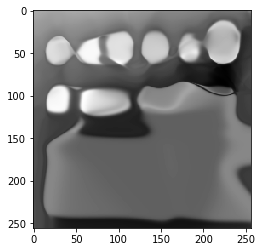

cost: [-0.017458495]
cost: [-0.010853873]
cost: [-0.092746116]
cost: [0.080435336]
cost: [-0.063286036]
cost: [-0.10764694]
cost: [-0.058314547]
cost: [-0.08517049]
cost: [0.004099507]
cost: [-0.10159334]
cost: [-0.037385255]
cost: [0.012221036]
cost: [0.008463214]
cost: [-0.0685119]
cost: [-0.09912281]
cost: [0.007290926]
cost: [-0.041978408]
cost: [0.059771866]
cost: [-0.0043366635]
cost: [-0.053315707]


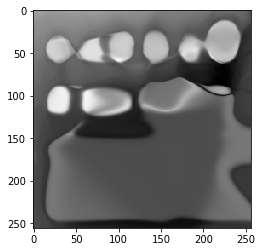

cost: [-0.08118555]
cost: [-0.02361998]
cost: [-0.09479547]
cost: [-0.056731947]
cost: [-0.060377374]
cost: [0.16143307]
cost: [0.008876912]
cost: [-0.037903693]
cost: [-0.088739224]
cost: [-0.03863839]
cost: [-0.042750604]
cost: [-0.029329538]
cost: [0.017450402]
cost: [-0.072529644]
cost: [-0.042015877]
cost: [-0.006083714]
cost: [-0.020569764]
cost: [-0.059124097]
cost: [-0.0949177]
cost: [-0.045178533]


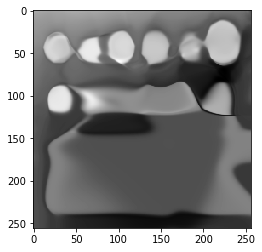

cost: [-0.07143451]
cost: [-0.009740862]
cost: [0.0021469663]
cost: [-0.08430496]
cost: [-0.06952663]
cost: [0.020695267]
cost: [-0.08675569]
cost: [-0.09274605]
cost: [0.018469546]
cost: [-0.05858901]
cost: [-0.036440942]
cost: [-0.06634152]
cost: [0.34211057]
cost: [-0.03580883]
cost: [-0.035690233]
cost: [-0.03668591]
cost: [-0.037103236]
cost: [-0.10476416]
cost: [-0.07839463]
cost: [0.09007273]


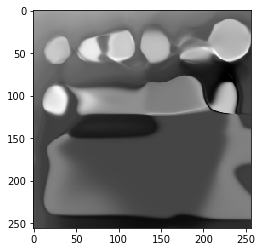

cost: [-0.10282862]
cost: [-0.11759749]
cost: [0.05925498]
cost: [0.015664864]
cost: [-0.11444851]
cost: [-0.12098558]
cost: [-0.10948436]
cost: [-0.03196571]
cost: [-0.07651663]
cost: [-0.07773046]
cost: [-0.10175529]
cost: [0.07900706]
cost: [-0.05852296]
cost: [-0.083520904]
cost: [-0.08673966]
cost: [-0.025651418]
cost: [-0.10873425]
cost: [-0.10736842]
cost: [-0.022001322]
cost: [-0.11070505]


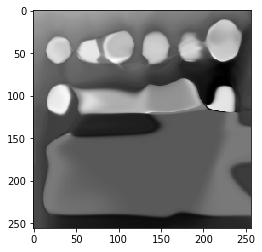

cost: [0.041993313]
cost: [0.041219518]
cost: [-0.11000621]
cost: [-0.083818525]
cost: [-0.044700146]
cost: [-0.092997186]
cost: [-0.08161253]
cost: [-0.09306943]
cost: [-0.11853781]
cost: [0.02259375]
cost: [-0.11885229]
cost: [-0.110129714]
cost: [-0.13542864]
cost: [-0.089522004]
cost: [-0.12435965]
cost: [0.02603142]
cost: [-0.1024584]
cost: [-0.13036515]
cost: [0.005536367]
cost: [0.045421414]


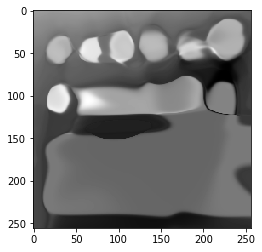

cost: [-0.08183755]
cost: [-0.14392698]
cost: [-0.10593185]
cost: [-0.07935387]
cost: [-0.09576376]
cost: [0.10069426]
cost: [-0.0329748]
cost: [-0.0661852]
cost: [-0.07738903]
cost: [-0.042809892]
cost: [-0.06056705]
cost: [-0.11982085]
cost: [-0.11651529]
cost: [-0.14421806]
cost: [0.31167504]
cost: [-0.046674274]
cost: [-0.09049496]
cost: [0.06148959]
cost: [-0.06005957]
cost: [-0.13616827]


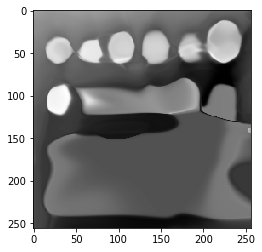

cost: [-0.1447891]
cost: [0.04193426]
cost: [-0.10098833]
cost: [-0.13041894]
cost: [-0.10948932]
cost: [0.03402284]
cost: [-0.115297735]
cost: [-0.0333685]
cost: [-0.15501855]
cost: [-0.06183985]
cost: [-0.097686574]
cost: [-0.11835006]
cost: [-0.05174849]
cost: [-0.088709556]
cost: [-0.07214396]
cost: [-0.048398755]
cost: [-0.1026718]
cost: [-0.029782303]
cost: [-0.15340663]
cost: [-0.075151056]


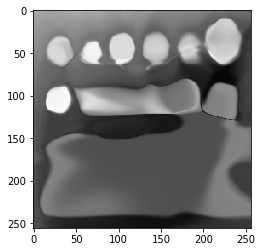

cost: [-0.14761296]
cost: [-0.13449667]
cost: [-0.16328904]
cost: [-0.15344328]
cost: [-0.13838547]
cost: [-0.11744188]
cost: [0.008122006]
cost: [-0.13827449]
cost: [-0.15616599]
cost: [-0.10822989]
cost: [0.044298396]
cost: [-0.1532552]
cost: [-0.17181367]
cost: [-0.08183802]
cost: [-0.14508088]
cost: [-0.15174979]
cost: [-0.12881377]
cost: [-0.13288473]
cost: [-0.12804456]
cost: [-0.16700824]


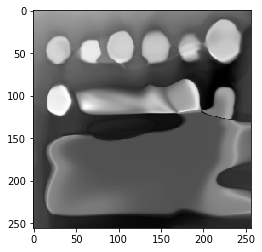

cost: [-0.04071553]
cost: [-0.1798566]
cost: [0.014088814]
cost: [-0.08734063]
cost: [-0.13192156]
cost: [-0.1242937]
cost: [-0.14747319]
cost: [-0.090900145]
cost: [-0.13021168]
cost: [-0.18009417]
cost: [-0.14634603]
cost: [-0.10845022]
cost: [-0.17956072]
cost: [-0.017513506]
cost: [-0.17419627]
cost: [-0.1412954]
cost: [-0.18860513]
cost: [-0.084200494]
cost: [0.011810563]
cost: [-0.1693945]


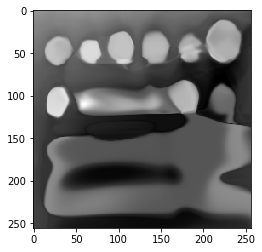

cost: [-0.19493648]
cost: [-0.20632419]
cost: [-0.19771892]
cost: [-0.112209275]
cost: [-0.1791451]
cost: [-0.23890495]
cost: [0.005527857]
cost: [0.020821627]
cost: [-0.14396898]
cost: [-0.16008013]
cost: [-0.052165996]
cost: [-0.09635326]
cost: [-0.20021278]
cost: [0.024862044]
cost: [-0.14837863]
cost: [-0.168677]
cost: [-0.17424583]
cost: [-0.10549196]
cost: [-0.16391091]
cost: [-0.21413821]


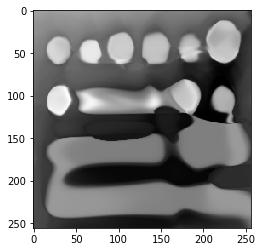

cost: [-0.21528678]
cost: [-0.18138412]
cost: [-0.15832354]
cost: [-0.19349954]
cost: [-0.22382891]
cost: [-0.14966932]
cost: [-0.23103064]
cost: [-0.25389203]
cost: [-0.06344801]
cost: [-0.11821938]
cost: [-0.23664083]
cost: [-0.17909105]
cost: [-0.05369253]
cost: [-0.21258506]
cost: [-0.16469815]
cost: [-0.2679881]
cost: [-0.109691195]
cost: [-0.097322516]
cost: [-0.16724497]
cost: [-0.22085714]


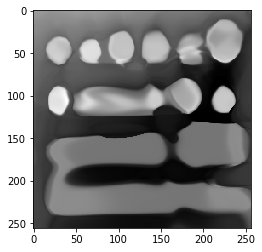

cost: [-0.25301224]
cost: [-0.04111781]
cost: [-0.22726583]
cost: [0.08814742]
cost: [-0.27426624]
cost: [-0.22143964]
cost: [-0.31599605]
cost: [-0.2259726]
cost: [-0.27783772]
cost: [-0.27459407]
cost: [-0.121905014]
cost: [-0.1800935]
cost: [-0.23680209]
cost: [-0.23480922]
cost: [-0.2590974]
cost: [-0.2887858]
cost: [-0.3213922]
cost: [-0.2847975]
cost: [-0.2521709]
cost: [-0.2555455]


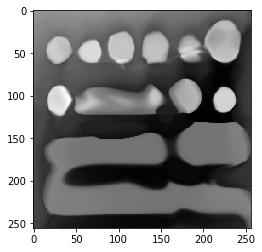

cost: [-0.064096086]
cost: [-0.22971773]
cost: [-0.21641809]
cost: [-0.23390761]
cost: [-0.28122884]
cost: [-0.2347948]
cost: [-0.317356]
cost: [-0.29583967]
cost: [-0.28262097]
cost: [-0.30324495]
cost: [-0.267658]
cost: [-0.2813452]
cost: [-0.29281008]
cost: [-0.2588284]
cost: [-0.24813372]
cost: [-0.29899076]
cost: [-0.2562185]
cost: [-0.2299259]
cost: [-0.31390664]
cost: [-0.17077245]


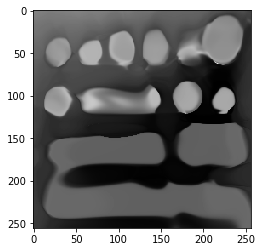

cost: [-0.303028]
cost: [-0.30173963]
cost: [-0.26384196]
cost: [-0.21793297]
cost: [-0.24766222]
cost: [-0.26851076]
cost: [-0.3050241]
cost: [-0.24123731]
cost: [-0.28465384]
cost: [-0.17225091]
cost: [-0.10914898]
cost: [-0.25132602]
cost: [-0.290766]
cost: [-0.23385942]
cost: [-0.19347872]
cost: [-0.3002104]
cost: [0.4088154]
cost: [0.3247647]
cost: [0.18255562]
cost: [0.011086125]


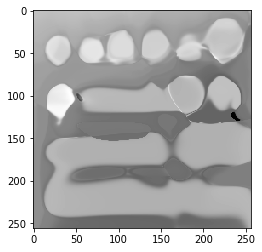

cost: [-0.08784014]
cost: [-0.17845869]
cost: [-0.22238255]
cost: [-0.17812109]
cost: [-0.19711822]
cost: [-0.13533692]
cost: [-0.15065736]
cost: [-0.20694402]
cost: [-0.24468455]
cost: [-0.19733855]
cost: [-0.17226914]
cost: [-0.17953873]
cost: [-0.20939177]
cost: [-0.19374973]
cost: [-0.18278658]
cost: [-0.18425143]
cost: [-0.20656902]
cost: [-0.17779319]
cost: [-0.19499616]
cost: [-0.22536533]


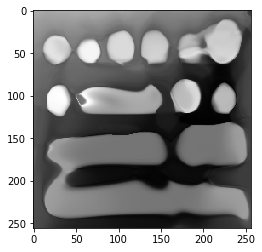

cost: [-0.22420034]
cost: [-0.23678216]
cost: [-0.21433716]
cost: [-0.26671615]
cost: [-0.26962176]
cost: [-0.22951242]
cost: [-0.29353398]
cost: [-0.28138196]
cost: [-0.12464759]
cost: [-0.25840276]
cost: [-0.1625199]
cost: [-0.20811698]
cost: [-0.18733194]
cost: [-0.26612854]
cost: [-0.18669039]
cost: [-0.2625879]
cost: [-0.21883042]
cost: [-0.28957528]
cost: [-0.17871931]
cost: [-0.307518]


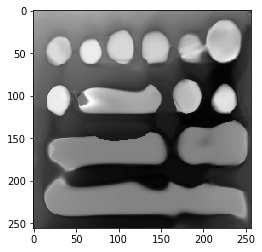

In [136]:
n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    img_d = img
    X, Y, cost, means = build_single_gaussian_model()
    optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)
    init_op = tf.global_variables_initializer()
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(init_op)
    # We now run a loop over epochs
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size:(batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
        this_cost = sess.run([cost], feed_dict={X: xs, Y: ys})
        print('cost:', this_cost)
        if (it_i + 1) % 20 == 0:
            ys_pred = means.eval(feed_dict={X: xs}, session=sess)
            #img = np.clip(ys_pred.reshape(img.shape), 0, 1)
            img_d = ys_pred.reshape(img_d.shape)
            img_d = img_d/np.amax(img_d)
            plt.imshow(img_d, cmap='gray')
            plt.show()